In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

theme = theme_xkcd() + theme(figure_size=(10,6))

/kaggle/input/california-housing-prices-data-extra-features/California_Houses.csv


## Reading dataset

In [78]:
data = pd.read_csv('../input/california-housing-prices-data-extra-features/California_Houses.csv')
data_original = data.copy()

In [79]:
print(data.shape)
data.head()

(20640, 14)


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [80]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [81]:
dict = {}
for col in list(data.columns):
    dict[col] = data[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Median_House_Value,3842
Median_Income,12928
Median_Age,52
Tot_Rooms,5926
Tot_Bedrooms,1928
Population,3888
Households,1815
Latitude,862
Longitude,844
Distance_to_coast,12590


In [82]:
cont_col = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast', 
            'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
loc_col = ['Latitude', 'Longitude']
dist_col = ['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = 'Median_House_Value'

In [83]:
def visualize_target(data, col_name):
    fig, ax = plt.subplots(2,1,figsize=(20,4), sharex=True)
    sns.distplot(data[col_name], color='#F59B00', hist_kws = {"alpha": 0.4}, ax=ax[0])
    sns.boxplot(x=col_name, data=data, palette = 'pink', ax=ax[1])
    print('{}'.format(col_name))
    print("Skewness: %f" % data[col_name].skew())
    print("Kurtosis: %f" % data[col_name].kurt())
    
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    outlier = []
    for i in data[col_name]:
        if i<(q1 - 1.5 * iqr) or i>(q3 + 1.5 * iqr):
            outlier.append(i)
    outlier = pd.DataFrame(outlier,columns=['outlier'])
    print('There is {}% Outlier removed in {} according to IQR rule'.format(round((outlier.shape[0]/data.shape[0])*100,2),col_name))
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data = data[(data[col_name] > fence_low) & (data[col_name] < fence_high)]
    return data

def corrmatrix(df,target_col,num=len(data)):
    corrmatrix = data.corr()
    plt.figure(figsize = (20,10))
    columnss = corrmatrix.nlargest(num, target_col)[target_col].index
    cm = np.corrcoef(data[columnss].values.T)
    sns.set(font_scale = 1)
    hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                     yticklabels = columnss.values, xticklabels = columnss.values)
    plt.show()

Median_House_Value
Skewness: 0.977763
Kurtosis: 0.327870


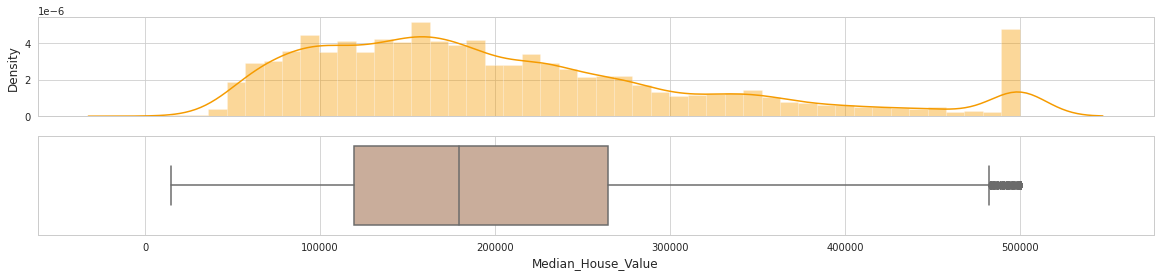

In [84]:
visualize_target(data,target)

There is 5.19% Outlier removed in Median_House_Value according to IQR rule
Median_House_Value
Skewness: 0.755952
Kurtosis: 0.012697


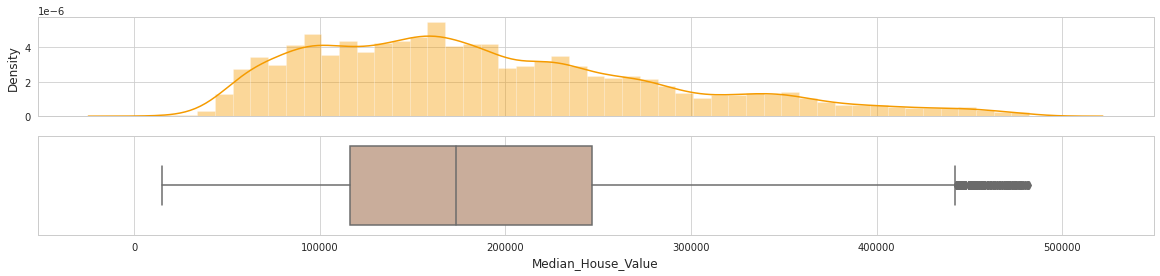

In [85]:
data = remove_outlier(data,target)
visualize_target(data,target)

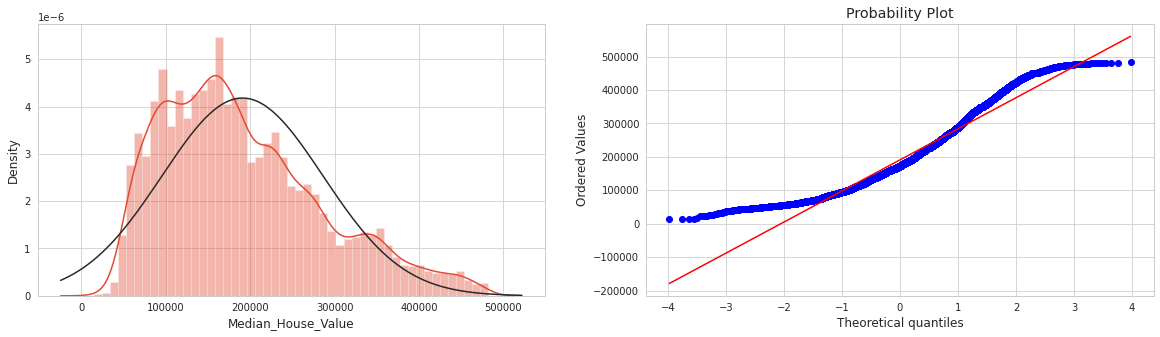

In [86]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data['Median_House_Value'], fit =stats.norm, ax=ax[0]);
res = stats.probplot(data['Median_House_Value'], plot=ax[1])

House Price Corresponding to location

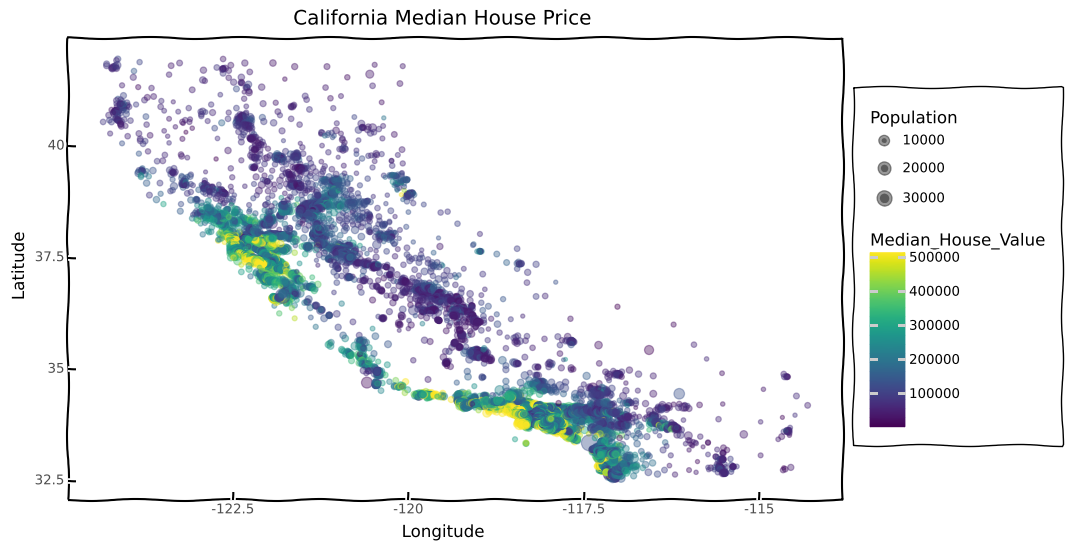

<ggplot: (8790939162889)>

In [87]:
(
ggplot(data = data_original) +
    geom_point(mapping=aes(x='Longitude', y= 'Latitude', size='Population', color='Median_House_Value'), alpha=0.4) + 
    labs(title = 'California Median House Price') + theme
)

## Shuffling Data and Preparing for training

In [88]:
data = data.sample(frac=1).reset_index(drop=True)

In [89]:
data.head(20)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,250000.0,4.8750,25,185,32,85,32,38.31,-121.93,21822.216306,577465.340474,756870.238536,108410.325150,74025.292128
1,210300.0,4.1344,36,1741,412,1245,423,33.90,-118.32,8177.709178,18332.260084,170112.461870,500152.305284,568116.455517
2,95500.0,2.5122,45,2299,514,1437,484,37.76,-122.16,6292.934151,542462.314379,721350.049309,52746.708014,23897.683584
3,321200.0,3.7562,48,2387,424,1041,408,37.75,-122.49,3239.962660,561420.922514,739718.678254,69962.087026,5808.154770
4,97900.0,2.3542,40,1802,496,2096,468,33.90,-118.22,16249.968194,17068.044252,164387.244070,506030.741363,574030.116247
5,51300.0,1.2639,16,245,57,81,33,33.19,-116.00,63505.530642,228799.709366,120488.527693,705940.976282,773522.257607
6,455500.0,8.0727,25,4601,696,2003,666,37.31,-122.05,18798.400884,499318.145490,677430.786588,14166.591625,61577.677586
7,169600.0,5.0200,26,3670,556,1616,550,38.66,-121.25,71333.374699,578690.338610,756916.488026,157688.900801,142675.701635
8,275000.0,6.2048,23,2564,347,1043,351,37.73,-121.93,23137.898523,526688.941238,705829.145521,43989.593365,44343.517631
9,131900.0,2.5200,28,1079,306,1358,285,34.05,-118.21,27187.740664,3113.125430,177469.916428,493965.243509,561996.480604


### Training Dataset

In [90]:
X = data.drop(['Median_House_Value', 'Longitude', 'Latitude'],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
y = data['Median_House_Value']

In [123]:
X

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,4.8750,25,185,32,85,32,21822.216306,577465.340474,756870.238536,108410.325150,74025.292128
1,4.1344,36,1741,412,1245,423,8177.709178,18332.260084,170112.461870,500152.305284,568116.455517
2,2.5122,45,2299,514,1437,484,6292.934151,542462.314379,721350.049309,52746.708014,23897.683584
3,3.7562,48,2387,424,1041,408,3239.962660,561420.922514,739718.678254,69962.087026,5808.154770
4,2.3542,40,1802,496,2096,468,16249.968194,17068.044252,164387.244070,506030.741363,574030.116247
...,...,...,...,...,...,...,...,...,...,...,...
19564,3.4028,52,2064,496,1726,466,2727.608734,557348.318304,735822.064076,65615.894384,2432.728355
19565,3.9489,21,2819,648,1435,593,5757.731853,19057.572538,189749.733160,480512.132407,548479.950773
19566,4.0000,49,1435,322,1008,329,3703.012409,556153.845036,734522.819531,64547.447890,4890.792814
19567,1.3882,15,1171,328,1024,298,20717.477548,285319.070347,150010.710437,765506.958563,833125.775424


In [124]:
y

0        250000.0
1        210300.0
2         95500.0
3        321200.0
4         97900.0
           ...   
19564    233300.0
19565    360200.0
19566    264000.0
19567     69400.0
19568    192000.0
Name: Median_House_Value, Length: 19569, dtype: float64

In [127]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(f'Train input: {X_train.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test input: {X_test.shape}')
print(f'Test target: {y_test.shape}')

Train input: (15655, 11)
Train target: (15655,)
Test input: (3914, 11)
Test target: (3914,)


## Fitting Models

In [94]:
r2 = []
model = []
RMSE = []
regressor = [LinearRegression(), RandomForestRegressor(),KNeighborsRegressor(),ensemble.GradientBoostingRegressor(),LGBMRegressor(),XGBRegressor()]
for obj in regressor:
    model_name = type(obj).__name__
    obj.fit(X_train, y_train)
    predict = obj.predict(X_test)
    r2.append(r2_score(y_test, predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared=False))
models = pd.DataFrame({'Model':model, 'r2':r2, 'RMSE':RMSE})

In [95]:
print(models)
models = models.set_index('Model')

                       Model        r2          RMSE
0           LinearRegression  0.588635  61627.753665
1      RandomForestRegressor  0.782135  44849.392731
2        KNeighborsRegressor  0.661583  55897.034248
3  GradientBoostingRegressor  0.740820  48917.430008
4              LGBMRegressor  0.791608  43863.460080
5               XGBRegressor  0.792288  43791.897450


Median_Income = 0.296
Median_Age = 0.032
Tot_Rooms = 0.026
Tot_Bedrooms = 0.04
Population = 0.044
Households = 0.026
Distance_to_coast = 0.212
Distance_to_LA = 0.076
Distance_to_SanDiego = 0.075
Distance_to_SanJose = 0.084
Distance_to_SanFrancisco = 0.088


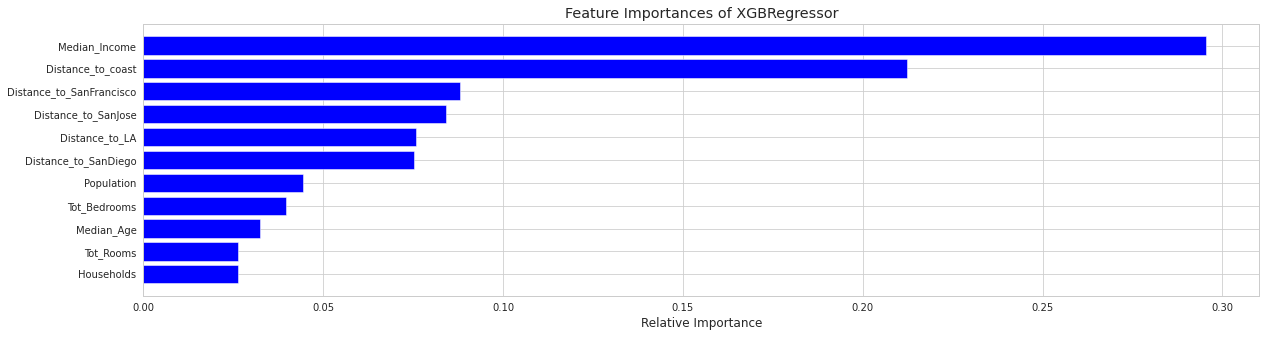

In [96]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
model_name = type(reg).__name__

for name, importance in zip(X, reg.feature_importances_):
    print(name, "=", round(importance,3))

features = X
importances = reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,5))
plt.title('Feature Importances of {}'.format(model_name))
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),features.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

## Median House Value Prediction

In [130]:
y_test = np.exp(y_test)
y_pred = np.exp(reg.predict(X_test))
# model_name = type(reg).__name__
# plt.subplots(figsize=(10,10))
# plt.scatter(y_pred,y_test,s=4, color='indianred')
# plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)
# plt.title('{}: Predictions vs Observed Values'.format(model_name))
# print("Accuracy score for {} is {:.2f}, RMSE is {:.2f}".format(model_name,r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False)))

[[-1.25501261e+00  3.71855647e-01 -5.27157870e-01 ...  8.51030939e-01
  -1.23137632e+00 -1.04901459e+00]
 [-2.00705286e-02  6.91920883e-01 -6.91489342e-02 ...  1.46487242e+00
  -8.92410043e-01 -1.19156031e+00]
 [-7.57094543e-01 -1.06843791e+00 -5.36318049e-01 ...  4.25615214e-01
  -6.94120949e-01 -5.15436922e-01]
 ...
 [-3.22274767e-01  1.31806721e-01 -2.49604455e-01 ... -7.21463380e-01
   6.00698130e-01  6.44321440e-01]
 [ 2.80336403e-01  1.41206766e+00 -6.36163997e-01 ... -7.77352254e-01
   6.75373432e-01  7.09267555e-01]
 [-5.01112218e-02  8.51953501e-01 -9.05602727e-04 ... -7.56766414e-01
   6.59531599e-01  6.95817808e-01]]
[inf inf inf ... inf inf inf]
